## Table of Contents
- [Introduction](#section_1)
- [Goal and Objectives](#section_2)
- [Data Information](#section_3)
- [Exploratory Data Analysis](#section_4)
- [Portfolio Optimization](#section_5)
    - [Stock Portfolios at the Efficient Frontier](#section_5.1)
    - [Effect of Adding More Assets on the Portfolio](#section_5.2)

## Introduction <a id="section_1"></a>

This project implements the Modern Portfolio Theory using the Python programming language. Harry Markowitz introduced Modern Portfolio Theory in 1952 to help investors construct portfolios that optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward.

At the center of this theory is the efficient frontier, which indicates the combination of investments that will provide the highest level of return for the lowest level of risk and is represented by a line. To know more about this theory, [click here](https://www.investopedia.com/terms/m/modernportfoliotheory.asp).

## Goal and Objectives <a id="section_2"></a>

The goal of this project is to select an optimized portfolio from a given number of stock investments. The objectives are the following:
- find multiple set of stock asset combinations.
- determine the expected returns and volatilitys of these set of portfolios
- choose the optimal allocation of each asset in the portfolio based on the investor's risk level.

## Data Information <a id="section_3"></a>

The data was retrieved from the [Market Watch](https://www.marketwatch.com/) and shows the daily stock prices of ten select stocks of publicly listed companies in the Philippine Stock Exchange Index starting January 20217 to December 2022.



In [21]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Cleaning

In [22]:
pgold = pd.read_excel('historical_data.xlsx', 'PGOLD')
aev = pd.read_excel('historical_data.xlsx', 'AEV')
phn = pd.read_excel('historical_data.xlsx', 'PHN')
secb = pd.read_excel('historical_data.xlsx', 'SECB')
mwc = pd.read_excel('historical_data.xlsx', 'MWC')

In [23]:
pgold.head()

,Date,PGOLD
0,12/29/2022,"""34.90"""
1,12/28/2022,"""34.95"""
2,12/27/2022,"""33.85"""
3,12/23/2022,"""33.90"""
4,12/22/2022,"""34.00"""


In [24]:
df = pgold.merge(aev).merge(phn).merge(secb).merge(mwc)
df.head()

,Date,PGOLD,AEV,PHN,SECB,MWC
0,12/29/2022,"""34.90""","""57.70""","""19.06""","""87.00""","""19.10"""
1,12/28/2022,"""34.95""","""57.75""","""19.00""","""88.50""","""18.50"""
2,12/27/2022,"""33.85""","""56.20""","""19.00""","""88.10""","""19.00"""
3,12/23/2022,"""33.90""","""56.80""","""19.00""","""87.80""","""18.92"""
4,12/22/2022,"""34.00""","""57.00""","""19.00""","""88.60""","""19.00"""


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1331 entries, 0 to 1330
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1331 non-null   object
 1   PGOLD   1331 non-null   object
 2   AEV     1331 non-null   object
 3   PHN     1331 non-null   object
 4   SECB    1331 non-null   object
 5   MWC     1331 non-null   object
dtypes: object(6)
memory usage: 72.8+ KB


In [26]:
df.dtypes

Date     object
PGOLD    object
AEV      object
PHN      object
SECB     object
MWC      object
dtype: object

In [27]:
#change the date to index
df = df.set_index('Date')

In [28]:
df.head()

,PGOLD,AEV,PHN,SECB,MWC
Date,,,,,
12/29/2022,"""34.90""","""57.70""","""19.06""","""87.00""","""19.10"""
12/28/2022,"""34.95""","""57.75""","""19.00""","""88.50""","""18.50"""
12/27/2022,"""33.85""","""56.20""","""19.00""","""88.10""","""19.00"""
12/23/2022,"""33.90""","""56.80""","""19.00""","""87.80""","""18.92"""
12/22/2022,"""34.00""","""57.00""","""19.00""","""88.60""","""19.00"""


In [29]:
#remove double quotes and change columns to float
df = df.replace('"', '', regex=True)
df = df.apply(pd.to_numeric)
df.head()

,PGOLD,AEV,PHN,SECB,MWC
Date,,,,,
12/29/2022,34.90,57.70,19.06,87.0,19.10
12/28/2022,34.95,57.75,19.00,88.5,18.50
12/27/2022,33.85,56.20,19.00,88.1,19.00
12/23/2022,33.90,56.80,19.00,87.8,18.92
12/22/2022,34.00,57.00,19.00,88.6,19.00


In [30]:
df.dtypes

PGOLD    float64
AEV      float64
PHN      float64
SECB     float64
MWC      float64
dtype: object

## Exploratory Data Analysis <a id="section_4"></a>

For the Exploratory Data Analysis (EDA), I will calculate the expected average return for each stock investments in the dataset as well as their volatility. I will also look for correlation among these assets.

<AxesSubplot:>

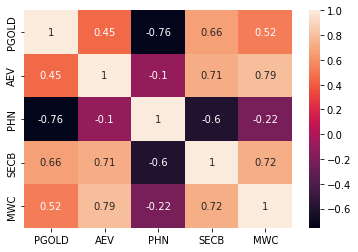

In [31]:
#check for correlation
sns.heatmap(df.corr(), annot=True)

## Portfolio Optimization <a id="section_5"></a>

In this section, I will now analyze the best stock allocations using the MPT. First, I will find a set of portfolios and calculate their returns, volatility, and weight allocations for each stock. I will then plot them into a graph. Lastly, I will find the optimal allocation for each stock and plot them in an interactive plot.

Note that the formula for the expected return is 
$$\operatorname {E} (R_{p})=\sum _{i}w_{i}\operatorname {E} (R_{i})\quad$$

where 

$R_{p}$
 is the return on the portfolio, 
$R_{i}$
 is the return on asset i and 
$w_{i}$
 is the weighting or proportion of component asset i, so that 
$${\displaystyle \sum _{i}w_{i}=1}$$

As for the portfolio variance, the formula is
$${\displaystyle \sigma _{p}^{2}=\sum _{i}w_{i}^{2}\sigma _{i}^{2}+\sum _{i}\sum _{j\neq i}w_{i}w_{j}\sigma _{i}\sigma _{j}\rho _{ij}}$$

where 

$\displaystyle \sigma _{i}$
 is the (sample) standard deviation of the periodic returns on an asset i, and 
$\rho _{ij}$
 is the correlation coefficient between the returns on assets i and j

In [32]:
#compute log percentage change
daily_pct_change = df.pct_change().apply(lambda x: np.log(1+x))
daily_pct_change.head()

,PGOLD,AEV,PHN,SECB,MWC
Date,,,,,
12/29/2022,NaN,NaN,NaN,NaN,NaN
12/28/2022,0.001432,0.000866,-0.003153,0.017094,-0.031918
12/27/2022,-0.031979,-0.027207,0.000000,-0.004530,0.026668
12/23/2022,0.001476,0.010620,0.000000,-0.003411,-0.004219
12/22/2022,0.002946,0.003515,0.000000,0.009070,0.004219


In [33]:
#log of cov matrix
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,PGOLD,AEV,PHN,SECB,MWC
PGOLD,0.000396,0.000104,0.000010,0.000077,0.000079
AEV,0.000104,0.000644,0.000020,0.000121,0.000084
PHN,0.000010,0.000020,0.000357,0.000037,0.000025
SECB,0.000077,0.000121,0.000037,0.000441,0.000123
MWC,0.000079,0.000084,0.000025,0.000123,0.000780


In [34]:
#change index to datetime index as resample function is only valid with datetime index
df.index=pd.to_datetime(df.index)


# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

PGOLD   -0.067512
AEV     -0.038170
PHN      0.228759
SECB    -0.163811
MWC      0.047371
dtype: float64

In [35]:
# Try to plug in weights to compute port return
w = [0.2, 0.1, 0.2, 0.5]
port_er = sum(w[i]*ind_er.loc[ind_er.index[i]] for i in range(len(w)))
port_er

-0.053473126825500226

<AxesSubplot:>

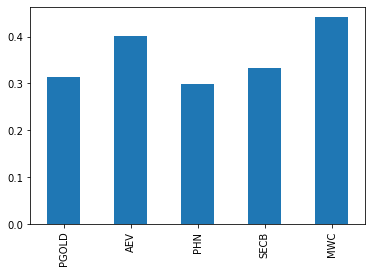

In [36]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd.plot(kind='bar')

In [37]:
# Creating a dataframe for returns and volatility
assets = pd.concat([ind_er, ann_sd], axis=1) 
assets.columns = ['Returns', 'Volatility']
assets


,Returns,Volatility
PGOLD,-0.067512,0.314703
AEV,-0.038170,0.401250
PHN,0.228759,0.298714
SECB,-0.163811,0.332164
MWC,0.047371,0.441695


In [38]:
# Define an empty array for portfolio returns, portfolio volatility, and asset weights
p_ret = [] 
p_vol = []  
p_weights = []   

num_assets = len(df.columns)
num_portfolios = 5000

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    # FInd the product of individual expected returns of asset and its weights 
    returns = np.dot(weights, ind_er) 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [39]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [40]:
# Dataframe of the 5000 portfolios created
portfolios = pd.DataFrame(data)
portfolios.head() 

,Returns,Volatility,PGOLD weight,AEV weight,PHN weight,SECB weight,MWC weight
0,0.042293,0.201699,0.028232,0.194654,0.372487,0.249777,0.154851
1,-0.042087,0.222978,0.235273,0.092301,0.072613,0.320600,0.279212
2,-0.030358,0.233751,0.058730,0.297832,0.089345,0.292220,0.261874
3,0.001605,0.204038,0.308565,0.256054,0.178274,0.098262,0.158845
4,0.018191,0.215904,0.011564,0.335632,0.283156,0.239141,0.130507


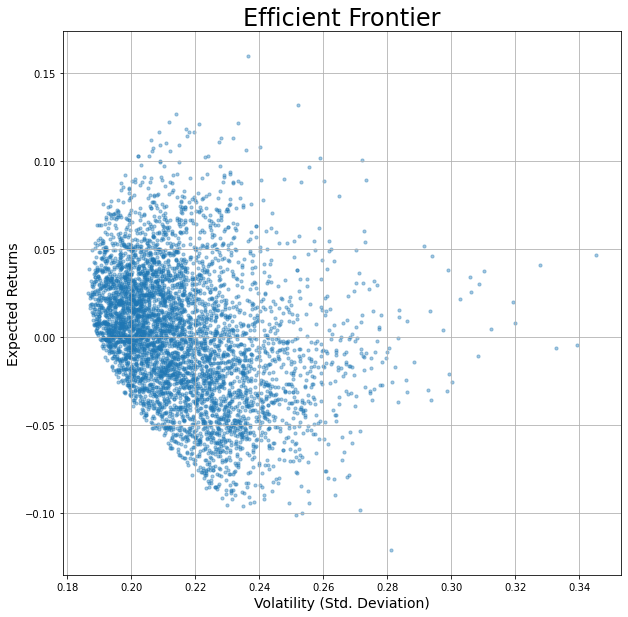

<Figure size 432x288 with 0 Axes>

In [47]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.4, grid=True, figsize=[10,10])
plt.ylabel('Expected Returns', fontsize=14)
plt.xlabel('Volatility (Std. Deviation)', fontsize=14)
plt.title('Efficient Frontier', fontsize=24)
plt.show()
plt.clf()

In [48]:
# use idxmin() to find the minimum value in the column specified. 
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
                              
min_vol_port

Returns         0.024775
Volatility      0.186620
PGOLD weight    0.257481
AEV weight      0.135758
PHN weight      0.315036
SECB weight     0.182531
MWC weight      0.109195
Name: 3643, dtype: float64

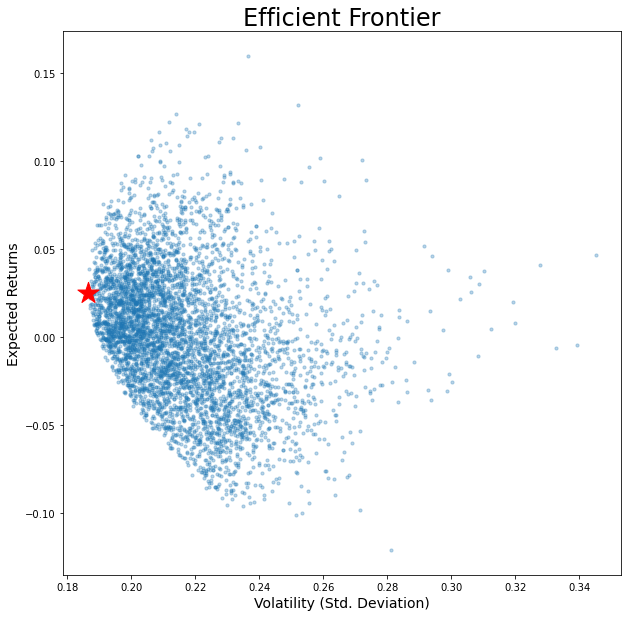

<Figure size 432x288 with 0 Axes>

In [49]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.ylabel('Expected Returns', fontsize=14)
plt.xlabel('Volatility (Std. Deviation)', fontsize=14)
plt.title('Efficient Frontier', fontsize=24)
plt.show()
plt.clf()

### Stock Portfolios at the Efficient Frontier <a id="section_5.1"></a>

The risk-free rate of return is the return on an investment with zero risk, meaning it’s the return investors could expect for taking no risk.

The optimal risky portfolio is the one with the highest Sharpe ratio. The formula for this ratio is:

Sharpe Ratio = (Portfolio Return - risk-free rate) / portfolio standard deviation

### Optimal Risky Portfolio 

An optimal risky portfolio can be considered as one that has highest Sharpe ratio.

In [50]:
# Finding the optimal portfolio
rf = 0.01 # risk factor

#find the portfolio with the highest sharpe ratio using formula and idxmax()
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.159723
Volatility      0.236399
PGOLD weight    0.045783
AEV weight      0.011711
PHN weight      0.694933
SECB weight     0.035225
MWC weight      0.212348
Name: 2493, dtype: float64

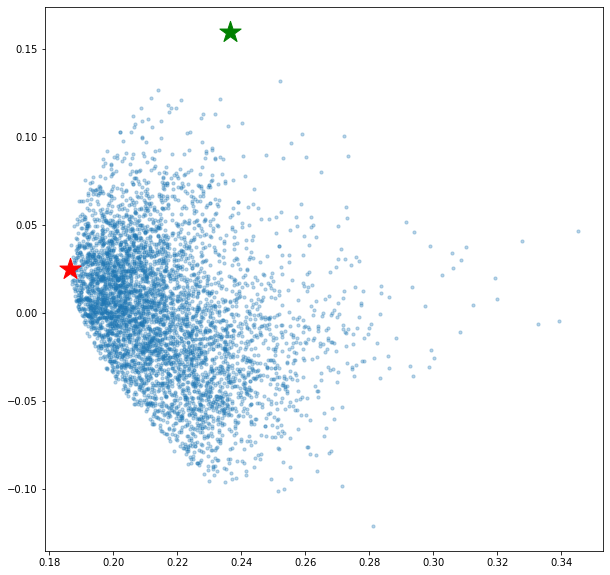

In [51]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)
plt.ylabel('Expected Returns', fontsize=14)
plt.xlabel('Volatility (Std. Deviation)', fontsize=14)
plt.title('Efficient Frontier', fontsize=24)
plt.show()
plt.clf()